step 1 - imports

In [ ]:
# Clean, compatible scientific stack
%pip install -U pip setuptools wheel

# Pin versions that work well together (and match your local target)
%pip install -U \
  numpy==2.1.3 \
  scipy==1.13.1 \
  scikit-learn==1.6.1 \
  pandas==2.2.2 \
  joblib==1.4.2 \
  matplotlib==3.8.4


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 15.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 46.7 MB/s eta 0:00:00
  Attempting uninstall: setuptools
    Found existing installation: setuptools 75.2.0
    Uninstalling setuptools-75.2.0:
      Successfully uninstalled setuptools-75.2.0
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython 7.34.0 requires jedi>=0.16, which is not installed.


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 110.7 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.2/38.2 MB 65.7 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 129.8 MB/s  0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: joblib
    Found existing installation: joblib 1.5.2
    Uninstalling joblib-1.5.2:
      Successfully uninstalled joblib-1.5.2
  Attempting uninstall: scipy
    Found existing installation: scipy 1.16.2
    Uninstalling scipy-1.16.2:
      Successfully uninstalled scipy-1.16.2
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.10.0
    Uninstalling matplotlib-3.10.0:
      Successfully uninstalled matplotlib-3.10.0
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4/4 [matplotlib]
ERROR: pip's dependency resolver does not currently take into account all the packages 

In [ ]:
import numpy, scipy, sklearn, pandas as pd, joblib, matplotlib
print("numpy", numpy.__version__)
print("scipy", scipy.__version__)
print("sklearn", sklearn.__version__)
print("pandas", pd.__version__)
print("joblib", joblib.__version__)
print("matplotlib", matplotlib.__version__)


numpy 2.1.3
scipy 1.13.1
sklearn 1.6.1
pandas 2.2.2
joblib 1.4.2
matplotlib 3.8.4


In [ ]:
!pip install -q --force-reinstall --no-deps \
  numpy==1.26.4 pandas==2.2.2 scikit-learn==1.6.1 joblib==1.4.2

# show what we actually got (pre-restart)
import numpy, sklearn, joblib, pandas as pd
print("Before restart -> numpy", numpy.__version__, "sklearn", sklearn.__version__, "joblib", joblib.__version__, "pandas", pd.__version__)

# IMPORTANT: restart the Colab Python process so NumPy downgrade is active
import os, sys
os.kill(os.getpid(), 9)



In [ ]:
import os, json, joblib, numpy as np, pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    roc_auc_score, brier_score_loss, classification_report, confusion_matrix,
    RocCurveDisplay, PrecisionRecallDisplay
)
from sklearn.calibration import CalibratedClassifierCV, CalibrationDisplay
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, HistGradientBoostingClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    classification_report
)


In [ ]:
import numpy, sklearn, joblib, pandas as pd
print("After restart -> numpy", numpy.__version__, "sklearn", sklearn.__version__, "joblib", joblib.__version__, "pandas", pd.__version__)
# Expect: numpy 1.26.4, sklearn 1.6.1, joblib 1.4.2, pandas 2.2.2


After restart -> numpy 1.26.4 sklearn 1.6.1 joblib 1.4.2 pandas 2.2.2


importing csv file

In [ ]:
from google.colab import files
uploaded = files.upload()
DATA_PATH = list(uploaded.keys())[0]
print("Using:", DATA_PATH)

Saving Car_Insurance_Claim.csv to Car_Insurance_Claim.csv
Using: Car_Insurance_Claim.csv


In [ ]:

# plotting defaults
plt.rcParams["figure.figsize"] = (7.5, 5)
plt.rcParams["axes.grid"] = True

RANDOM_STATE = 42
DATA_PATH = "Car_Insurance_Claim.csv"


Loading the dataset


In [ ]:
df_raw = pd.read_csv(DATA_PATH)
print("Shape:", df_raw.shape)
display(df_raw.head())
display(df_raw.tail())


Shape: (10000, 19)


,ID,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,569520,65+,female,majority,0-9y,high school,upper class,0.629027,1,after 2015,0,1,10238,12000.0,sedan,0,0,0,0
1,750365,16-25,male,majority,0-9y,none,poverty,0.357757,0,before 2015,0,0,10238,16000.0,sedan,0,0,0,1
2,199901,16-25,female,majority,0-9y,high school,working class,0.493146,1,before 2015,0,0,10238,11000.0,sedan,0,0,0,0
3,478866,16-25,male,majority,0-9y,university,working class,0.206013,1,before 2015,0,1,32765,11000.0,sedan,0,0,0,0
4,731664,26-39,male,majority,10-19y,none,working class,0.388366,1,before 2015,0,0,32765,12000.0,sedan,2,0,1,1


,ID,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
9995,323164,26-39,female,majority,10-19y,university,upper class,0.582787,1,before 2015,0,0,10238,16000.0,sedan,0,0,1,0
9996,910346,26-39,female,majority,10-19y,none,middle class,0.522231,1,after 2015,0,1,32765,NaN,sedan,1,0,0,0
9997,468409,26-39,male,majority,0-9y,high school,middle class,0.470940,1,before 2015,0,1,10238,14000.0,sedan,0,0,0,0
9998,903459,26-39,female,majority,10-19y,high school,poverty,0.364185,0,before 2015,0,1,10238,13000.0,sedan,2,0,1,1
9999,442696,26-39,female,majority,0-9y,none,working class,0.435225,1,before 2015,1,1,10238,13000.0,sedan,0,0,0,0


Quick data audit

In [ ]:
print("\nColumn dtypes:\n", df_raw.dtypes)
print("\nTarget distribution (raw, as loaded):")
target_col_guess = "outcome"  # update if different
if target_col_guess in df_raw.columns:
    display(df_raw[target_col_guess].value_counts(dropna=False))

print("\nNull counts:")
display(df_raw.isna().sum().sort_values(ascending=False))



Column dtypes:
 ID                       int64
AGE                     object
GENDER                  object
RACE                    object
DRIVING_EXPERIENCE      object
EDUCATION               object
INCOME                  object
CREDIT_SCORE           float64
VEHICLE_OWNERSHIP        int64
VEHICLE_YEAR            object
MARRIED                  int64
CHILDREN                 int64
POSTAL_CODE              int64
ANNUAL_MILEAGE         float64
VEHICLE_TYPE            object
SPEEDING_VIOLATIONS      int64
DUIS                     int64
PAST_ACCIDENTS           int64
OUTCOME                  int64
dtype: object

Target distribution (raw, as loaded):

Null counts:


,0
CREDIT_SCORE,982
ANNUAL_MILEAGE,957
ID,0
MARRIED,0
PAST_ACCIDENTS,0
DUIS,0
SPEEDING_VIOLATIONS,0
VEHICLE_TYPE,0
POSTAL_CODE,0
CHILDREN,0


Data Cleaning


In [ ]:
df = df_raw.copy()
df = df.drop_duplicates().replace(["NA","N/A","null","None","?"], np.nan)
df.columns = df.columns.str.lower()
print(df.columns)
# normalize strings
for c in df.select_dtypes(include="object").columns:
    df[c] = df[c].astype(str).str.strip().str.lower().replace("nan", np.nan)

# fill numerics with median, categoricals with mode (keep target intact)
for c in df.columns:
    if c == "outcome":
        continue
    if pd.api.types.is_numeric_dtype(df[c]):
        df[c] = pd.to_numeric(df[c], errors="coerce").fillna(df[c].median())
    else:
        df[c] = df[c].fillna(df[c].mode().iloc[0])

print("After cleaning:", df.shape)


Index(['id', 'age', 'gender', 'race', 'driving_experience', 'education',
       'income', 'credit_score', 'vehicle_ownership', 'vehicle_year',
       'married', 'children', 'postal_code', 'annual_mileage', 'vehicle_type',
       'speeding_violations', 'duis', 'past_accidents', 'outcome'],
      dtype='object')
After cleaning: (10000, 19)


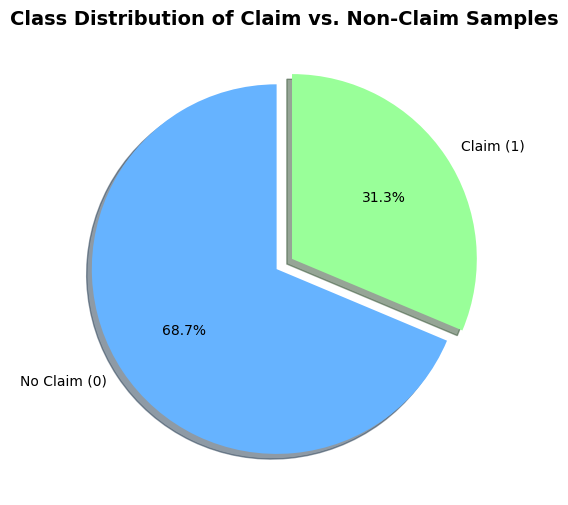

In [ ]:
claim_counts = df['outcome'].value_counts()

# Plot pie chart
plt.figure(figsize=(6, 6))
colors = ['#66b3ff', '#99ff99']
labels = ['No Claim (0)', 'Claim (1)']
plt.pie(
    claim_counts,
    labels=labels,
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    shadow=True,
    explode=(0.05, 0.05)
)
plt.title('Class Distribution of Claim vs. Non-Claim Samples', fontsize=14, fontweight='bold')
plt.show()

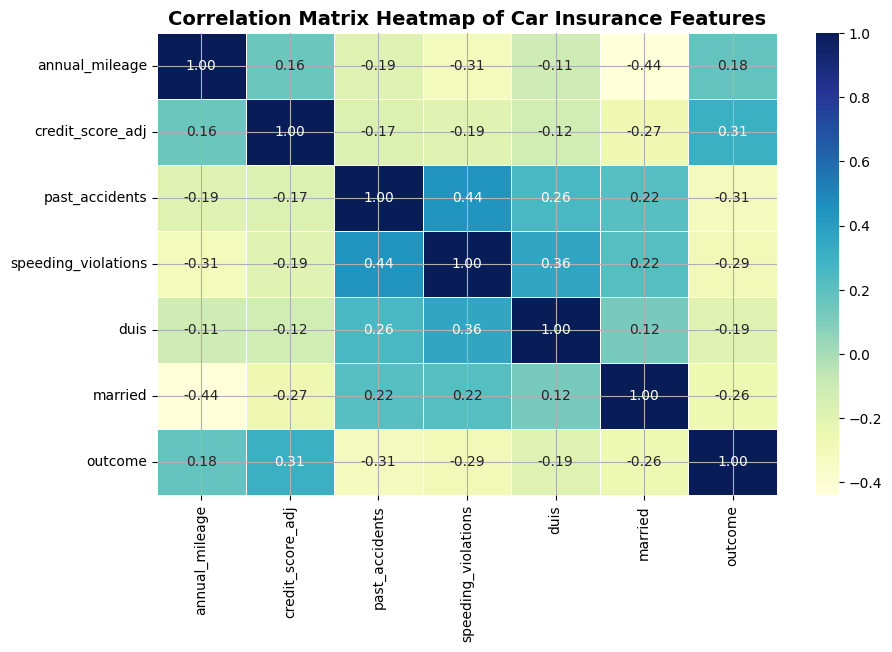

In [ ]:

numeric_df = df.select_dtypes(include=['int64', 'float64'])
corr_matrix = numeric_df.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(
    data=corr_matrix,
    annot=True,
    fmt=".2f",
    cmap="YlGnBu",
    linewidths=0.5
)
plt.title("Correlation Matrix Heatmap of Car Insurance Features", fontsize=14, fontweight='bold')
plt.show()

EDA

Target distribution (cleaned):


,ratio
outcome,
0,0.6867
1,0.3133


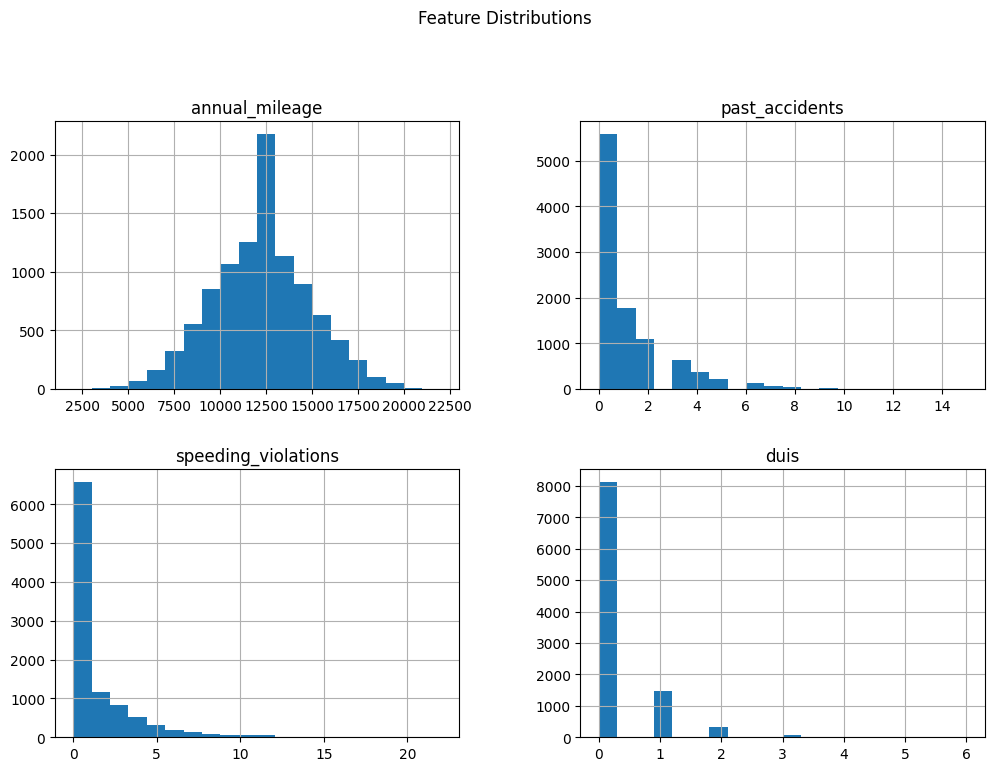

NameError: name 'claim_counts' is not defined

<Figure size 600x600 with 0 Axes>

In [ ]:
# target balance (after cleaning)
print("Target distribution (cleaned):")
display(df["outcome"].value_counts(normalize=True).rename("ratio").to_frame())

# simple histograms for a few key features
cols_to_plot = [c for c in ["age","vehicle_year","annual_mileage","credit_score","past_accidents","speeding_violations","duis"] if c in df.columns]
df[cols_to_plot].hist(bins=20, figsize=(12, 8))
plt.suptitle("Feature Distributions", y=1.02)
plt.show()




Feature engineering

In [ ]:
# keep UI intuitive: higher credit score => safer
df["credit_score_adj"] = 1.0 - df["credit_score"]

use_cols = [
    "age","gender","vehicle_year","vehicle_type","annual_mileage",
    "credit_score_adj","past_accidents","speeding_violations","duis","married","outcome"
]
df = df[use_cols].copy()

base_feats = [
    "age","vehicle_year","vehicle_type","annual_mileage","credit_score_adj",
    "past_accidents","speeding_violations","duis","gender","married"
]

# one-hot encode like the app
X = pd.get_dummies(df[base_feats], drop_first=False)
y = (df["outcome"] == 0).astype(int)   # 1 = CLAIM, 0 = NO-CLAIM

print("X shape:", X.shape, " | y shape:", y.shape)


X shape: (10000, 16)  | y shape: (10000,)


Train/test split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=RANDOM_STATE, stratify=y
)
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((8000, 16), (2000, 16), (8000,), (2000,))

Model training

In [ ]:
def proba_of_class_one(model, X):
    """Return probability of class 1 (CLAIM) robustly."""
    classes = getattr(model, "classes_", [0, 1])
    if 1 in classes:
        idx = list(classes).index(1)
        return model.predict_proba(X)[:, idx]
    # fallback (shouldn't happen if classifier has proper classes_)
    return model.predict_proba(X)[:, 1]

def eval_classifier(name, model, X_tr, y_tr, X_te, y_te):
    """Fit model, compute metrics, and return a dict of results."""
    model.fit(X_tr, y_tr)
    if hasattr(model, "predict_proba"):
        proba_te = proba_of_class_one(model, X_te)
    else:
        # if no predict_proba, approximate via decision_function
        # map scores to [0,1] with a logistic transform (only for emergency fallback)
        scores = model.decision_function(X_te)
        proba_te = 1.0 / (1.0 + np.exp(-scores))

    y_pred = (proba_te >= 0.5).astype(int)

    return {
        "model": name,
        "accuracy": accuracy_score(y_te, y_pred),
        "precision": precision_score(y_te, y_pred, zero_division=0),
        "recall": recall_score(y_te, y_pred, zero_division=0),
        "f1": f1_score(y_te, y_pred, zero_division=0),
        "roc_auc": roc_auc_score(y_te, proba_te),
        "clf": model,                            # return the fitted model too
        "proba_test": proba_te,                  # and its probabilities
        "report": classification_report(y_te, y_pred, zero_division=0)
    }

In [ ]:
# === Cell: train baseline models (for the report) ===
results = []

# 1) Logistic Regression (baseline, calibrated by nature when well-posed)
log_reg = LogisticRegression(max_iter=1000, class_weight="balanced", random_state=RANDOM_STATE)
results.append(eval_classifier("Logistic Regression", log_reg, X_train, y_train, X_test, y_test))

# 2) Random Forest
rf = RandomForestClassifier(
    n_estimators=300, max_depth=12, min_samples_leaf=2,
    class_weight="balanced_subsample", random_state=RANDOM_STATE, n_jobs=-1
)
results.append(eval_classifier("Random Forest", rf, X_train, y_train, X_test, y_test))

# 3) Gradient Boosting (GBDT)
gb = GradientBoostingClassifier(random_state=RANDOM_STATE)
results.append(eval_classifier("Gradient Boosting", gb, X_train, y_train, X_test, y_test))

# Summary table
summary_df = pd.DataFrame([
    {k: v for k, v in r.items() if k in ["model","accuracy","precision","recall","f1","roc_auc"]}
    for r in results
]).sort_values("roc_auc", ascending=False).reset_index(drop=True)

display(summary_df.style.format({"accuracy": "{:.3f}", "precision": "{:.3f}", "recall": "{:.3f}", "f1": "{:.3f}", "roc_auc": "{:.3f}"}))

# Optional: print reports if you want
for r in results:
    print(f"\n=== {r['model']} ===")
    print(r["report"])


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,model,accuracy,precision,recall,f1,roc_auc
0,Gradient Boosting,0.818,0.850,0.892,0.870,0.875
1,Random Forest,0.801,0.885,0.816,0.850,0.866
2,Logistic Regression,0.776,0.903,0.755,0.823,0.863



=== Logistic Regression ===
              precision    recall  f1-score   support

           0       0.61      0.82      0.70       627
           1       0.90      0.76      0.82      1373

    accuracy                           0.78      2000
   macro avg       0.75      0.79      0.76      2000
weighted avg       0.81      0.78      0.78      2000


=== Random Forest ===
              precision    recall  f1-score   support

           0       0.66      0.77      0.71       627
           1       0.89      0.82      0.85      1373

    accuracy                           0.80      2000
   macro avg       0.77      0.79      0.78      2000
weighted avg       0.81      0.80      0.81      2000


=== Gradient Boosting ===
              precision    recall  f1-score   support

           0       0.73      0.65      0.69       627
           1       0.85      0.89      0.87      1373

    accuracy                           0.82      2000
   macro avg       0.79      0.77      0.78      

In [ ]:
base = HistGradientBoostingClassifier(
    max_depth=4,
    learning_rate=0.07,
    max_iter=400,
    early_stopping=True,
    random_state=RANDOM_STATE
)

model = CalibratedClassifierCV(estimator=base, method="isotonic", cv=5)
model.fit(X_train, y_train)

# probability for class 1 (CLAIM)
proba_test = model.predict_proba(X_test)[:, list(model.classes_).index(1)]

print("classes_:", list(model.classes_))
print("ROC-AUC:", round(roc_auc_score(y_test, proba_test), 3))
print("Brier score (lower is better):", round(brier_score_loss(y_test, proba_test), 4))
print(classification_report(y_test, (proba_test >= 0.5).astype(int)))


classes_: [0, 1]
ROC-AUC: 0.871
Brier score (lower is better): 0.1311
              precision    recall  f1-score   support

           0       0.74      0.64      0.69       627
           1       0.85      0.90      0.87      1373

    accuracy                           0.82      2000
   macro avg       0.79      0.77      0.78      2000
weighted avg       0.81      0.82      0.81      2000



Confusion matrix

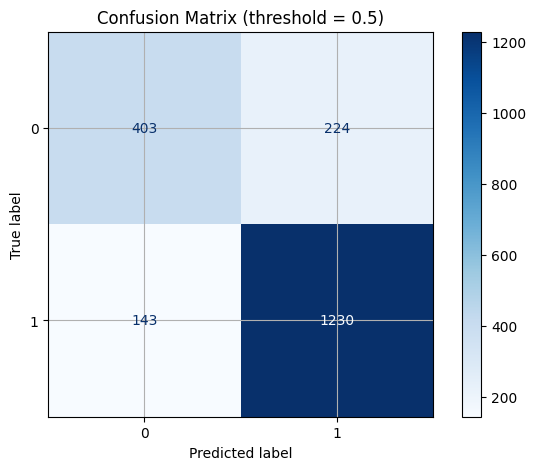

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

y_pred_05 = (proba_test >= 0.5).astype(int)
cm = confusion_matrix(y_test, y_pred_05, labels=[0,1])

disp = ConfusionMatrixDisplay(cm, display_labels=[0,1])
disp.plot(cmap="Blues", values_format="d")
plt.title("Confusion Matrix (threshold = 0.5)")
plt.show()


Curves: ROC, Precision–Recall

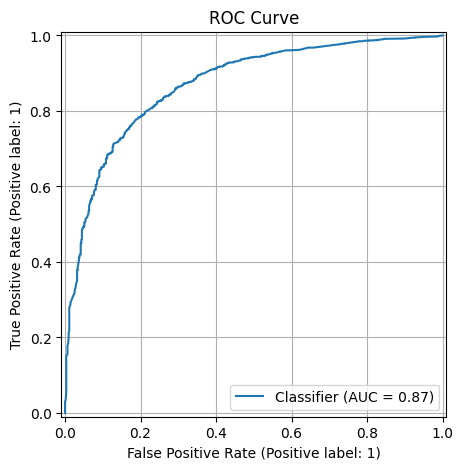

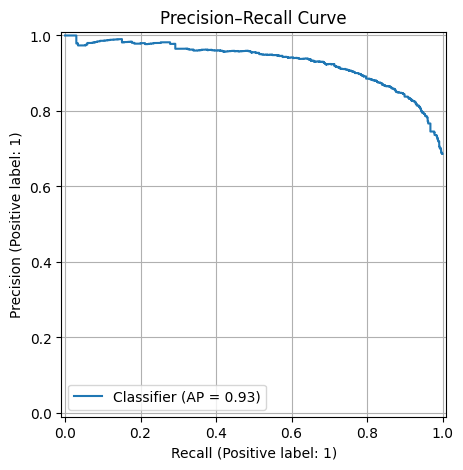

In [ ]:
RocCurveDisplay.from_predictions(y_test, proba_test)
plt.title("ROC Curve")
plt.show()

PrecisionRecallDisplay.from_predictions(y_test, proba_test)
plt.title("Precision–Recall Curve")
plt.show()


Calibration curve

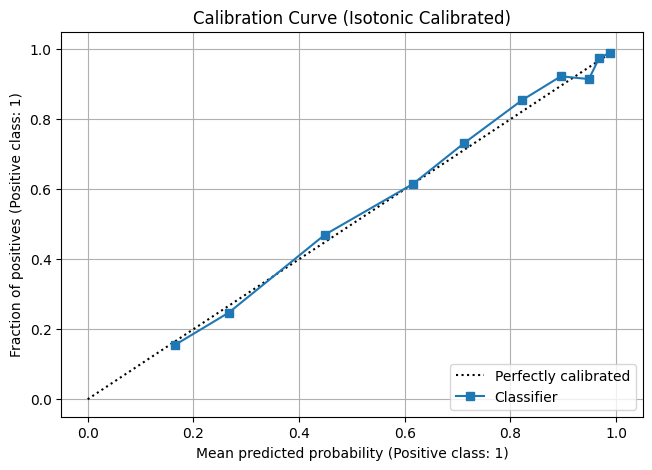

In [ ]:
CalibrationDisplay.from_predictions(y_test, proba_test, n_bins=10, strategy="quantile")
plt.title("Calibration Curve (Isotonic Calibrated)")
plt.show()


Feature importance (tree-based)

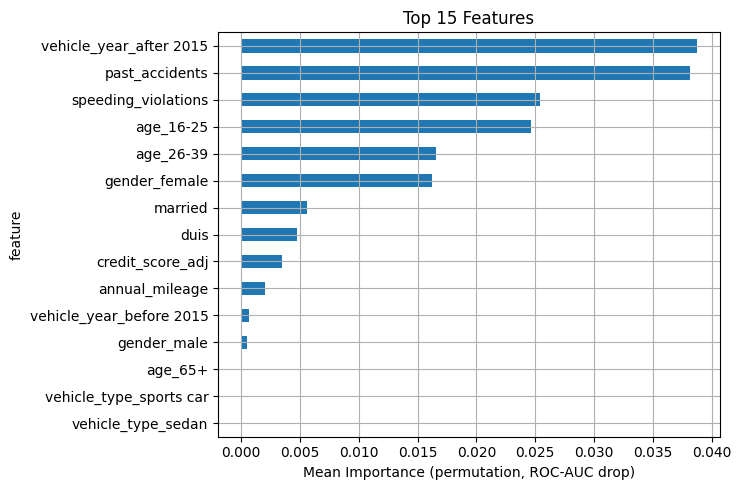

,feature,importance
10,vehicle_year_after 2015,0.038762
2,past_accidents,0.038121
3,speeding_violations,0.025401
6,age_16-25,0.024642
7,age_26-39,0.016542
14,gender_female,0.016232
5,married,0.005582
4,duis,0.004718
1,credit_score_adj,0.003426
0,annual_mileage,0.001981


In [ ]:
# HGB doesn't expose .feature_importances_, so we use permutation importance for interpretability
from sklearn.inspection import permutation_importance

perm = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=RANDOM_STATE, scoring="roc_auc")
imp = pd.DataFrame({"feature": X_test.columns, "importance": perm.importances_mean}).sort_values("importance", ascending=False)

topn = 15
ax = imp.head(topn).iloc[::-1].plot(kind="barh", x="feature", y="importance", legend=False)
ax.set_xlabel("Mean Importance (permutation, ROC-AUC drop)")
ax.set_title(f"Top {topn} Features")
plt.tight_layout()
plt.show()

display(imp.head(25))


Data-driven thresholds for UI buckets

In [ ]:
from sklearn.metrics import precision_recall_curve

prec, rec, thr = precision_recall_curve(y_test, proba_test)
if any(prec[:-1] >= 0.75):
    t_high = float(thr[np.where(prec[:-1] >= 0.75)[0][0]])
else:
    t_high = 0.70

prec0, rec0, thr0 = precision_recall_curve(1 - y_test, 1 - proba_test)
if any(prec0[:-1] >= 0.75):
    t_low = 1.0 - float(thr0[np.where(prec0[:-1] >= 0.75)[0][0]])
else:
    t_low = 0.40

print(f"Suggested thresholds -> Low if < {t_low:.3f}, High if ≥ {t_high:.3f}")


Suggested thresholds -> Low if < 0.485, High if ≥ 0.250


Save artifacts

In [ ]:
joblib.dump(model, "model.pkl")
with open("model_features.json", "w") as f: json.dump(list(X.columns), f)
with open("thresholds.json", "w") as f: json.dump({"t_low": float(t_low), "t_high": float(t_high)}, f)

# optional defaults used by the Flask form
with open("defaults.json", "w") as f:
    json.dump({
        "age": 30, "gender": "male", "vehicle_year": 2020, "vehicle_type": "sedan",
        "annual_mileage": 8000, "credit_score": 0.9,
        "past_accidents": 0, "speeding_violations": 0, "duis": 0, "married": "yes"
    }, f)

print("Artifacts saved: model.pkl, model_features.json, thresholds.json, defaults.json")


Artifacts saved: model.pkl, model_features.json, thresholds.json, defaults.json


sample prediction

In [ ]:
sample = pd.DataFrame([{
    "age": 35, "gender": "female", "vehicle_year": 2017, "vehicle_type": "suv",
    "annual_mileage": 14000, "credit_score_adj": 1 - 0.72,
    "past_accidents": 0, "speeding_violations": 1, "duis": 0, "married": "yes"
}])

Xs = pd.get_dummies(sample, drop_first=False)
# align to training columns
for c in X.columns:
    if c not in Xs.columns: Xs[c] = 0
Xs = Xs[X.columns]

proba = model.predict_proba(Xs)[0, list(model.classes_).index(1)]
print(f"Sample CLAIM probability: {proba:.3f}")


Sample CLAIM probability: 0.874


Download Artifacts


In [ ]:
from google.colab import files
for f in ["model.pkl", "model_features.json", "defaults.json","thresholds.json"]:
    files.download(f)
